In [1]:
# Let's use LangChain to set up document retrieval 

# Text splitting

let's go through all of the chapters and get a sense of how many words are in each paragraph

In [6]:
# let's write a loop that will get the character count for each paragraph in the book
import glob
CHAPTER_DIR = "../data/books/three_body/text/*"

In [7]:
files = glob.glob(CHAPTER_DIR)

In [31]:
paragraph_lengths = []

for text_file in files[:]:
    with open(text_file, "r") as f:
        lines = f.readlines()
        line_lengths = [len(line) for line in lines]
        paragraph_lengths += line_lengths

print(f"{len(files)} chapters in the book")
print(f"{sum(paragraph_lengths)} characters in the book")
print(f"average of {len(paragraph_lengths)/len(files):.2f} chapters per paragraph")
print(f"total of {len(paragraph_lengths)} in the book")
print(f"average of {sum(paragraph_lengths)/len(paragraph_lengths):.2f} characters per paragraph")

36 chapters in the book
188380 characters in the book
average of 69.78 chapters per paragraph
total of 2512 in the book
average of 74.99 characters per paragraph


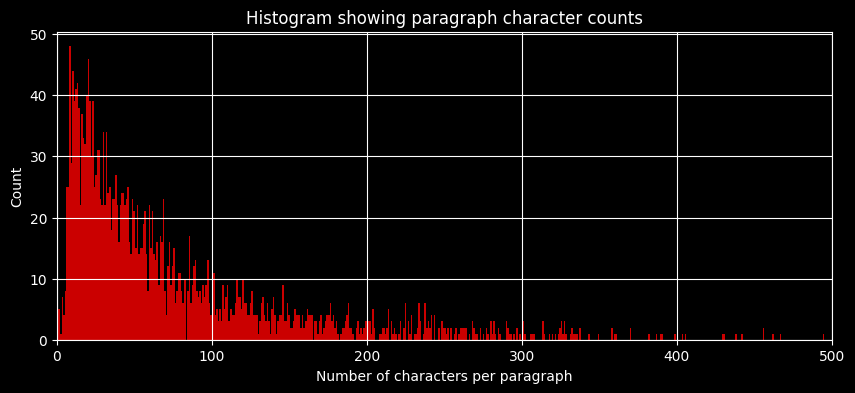

In [39]:
import matplotlib.pyplot as plt
import numpy as np

data = paragraph_lengths
plt.style.use('dark_background')

# Create a histogram\
plt.figure(figsize=(10,4))
plt.hist(data, bins=500, color='red', alpha=0.8)
plt.xlabel('Number of characters per paragraph')
plt.ylabel('Count')
plt.title('Histogram showing paragraph character counts')
plt.grid(True)
plt.xlim([0, 500])

plt.savefig("../img/hist.png")
plt.show()

We could try putting the entire book into a single document and then splitting on `\n` (newline).

In [45]:
# write all chapter text files to a single document
CHAPTER_DIR = "../data/books/three_body/text/*"

# TODO: fix order of chapters
# does order matter with this text loader/transformer?
chapter_files = glob.glob(CHAPTER_DIR)

with open("../data/books/three_body/full_text_cn.txt", "w") as f:
    for chapter_file in chapter_files:
        with open(chapter_file, "r") as c_f:
            f.write(c_f.read())
            # f.write("\n")

In [51]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    # Set a really small chunk size, just to show.
    chunk_size = 400,
    separators = ["\n"],
    keep_separator = False,
    chunk_overlap  = 20,
    length_function = len,
    add_start_index = True,
)

In [53]:
with open("../data/books/three_body/full_text_cn.txt", "r") as f:
    three_body_book = f.read()


texts = text_splitter.create_documents([three_body_book])